In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install xgboost

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Exploratory Data Analysis

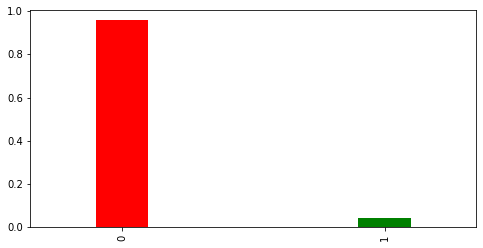

In [11]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))
plt.show()

In [12]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
5,81.0,0,0,186.21,29.0


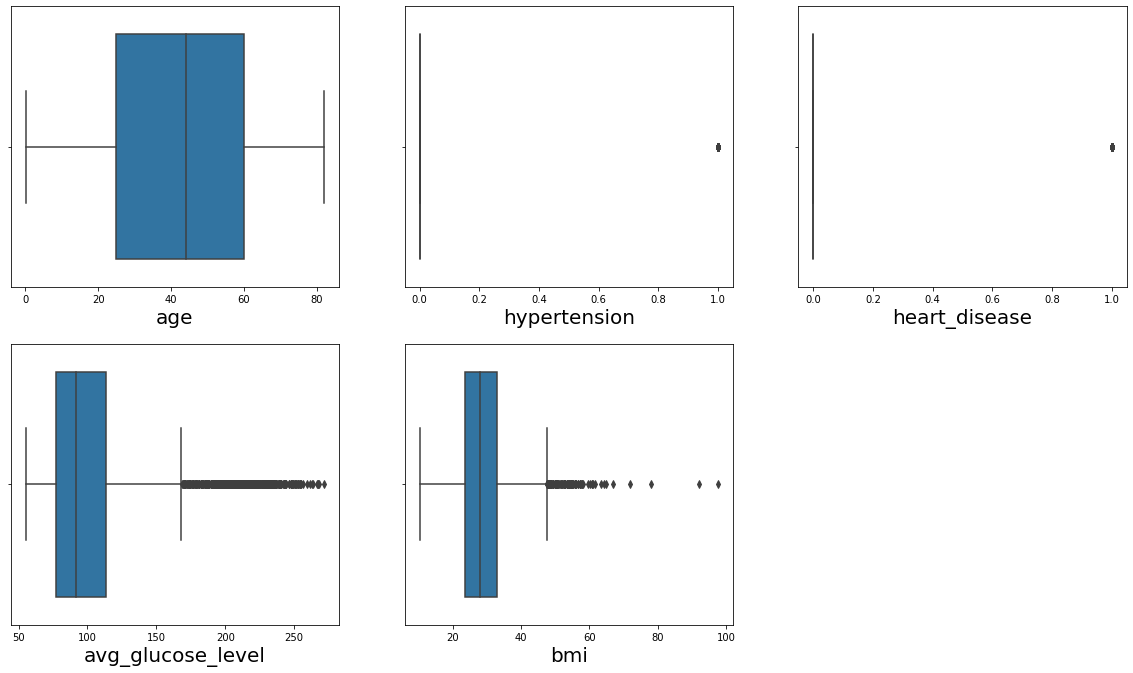

In [13]:
# outliers
plt.figure(figsize=(20,30), facecolor='white')
n=1

for column in cols:
    if n<=15:
        ax = plt.subplot(5,3,n)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    n+=1

In [14]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

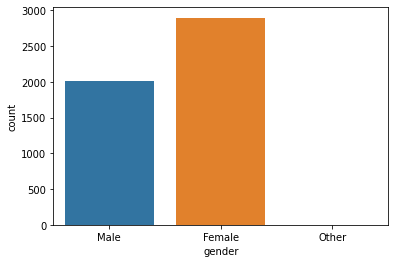

In [15]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

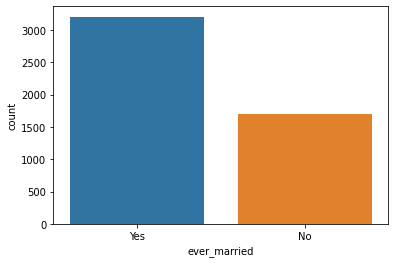

In [16]:
sns.countplot(df['ever_married'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

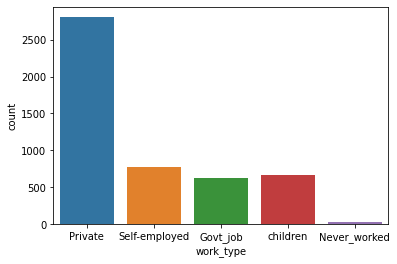

In [17]:
sns.countplot(df['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

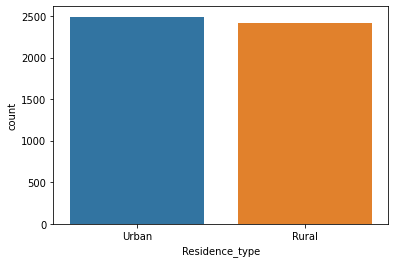

In [18]:
sns.countplot(df['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

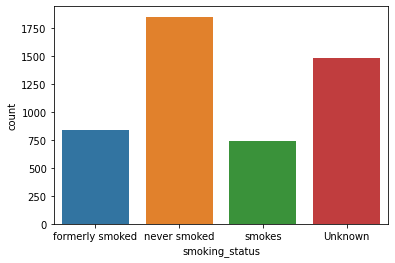

In [19]:
sns.countplot(df['smoking_status'])

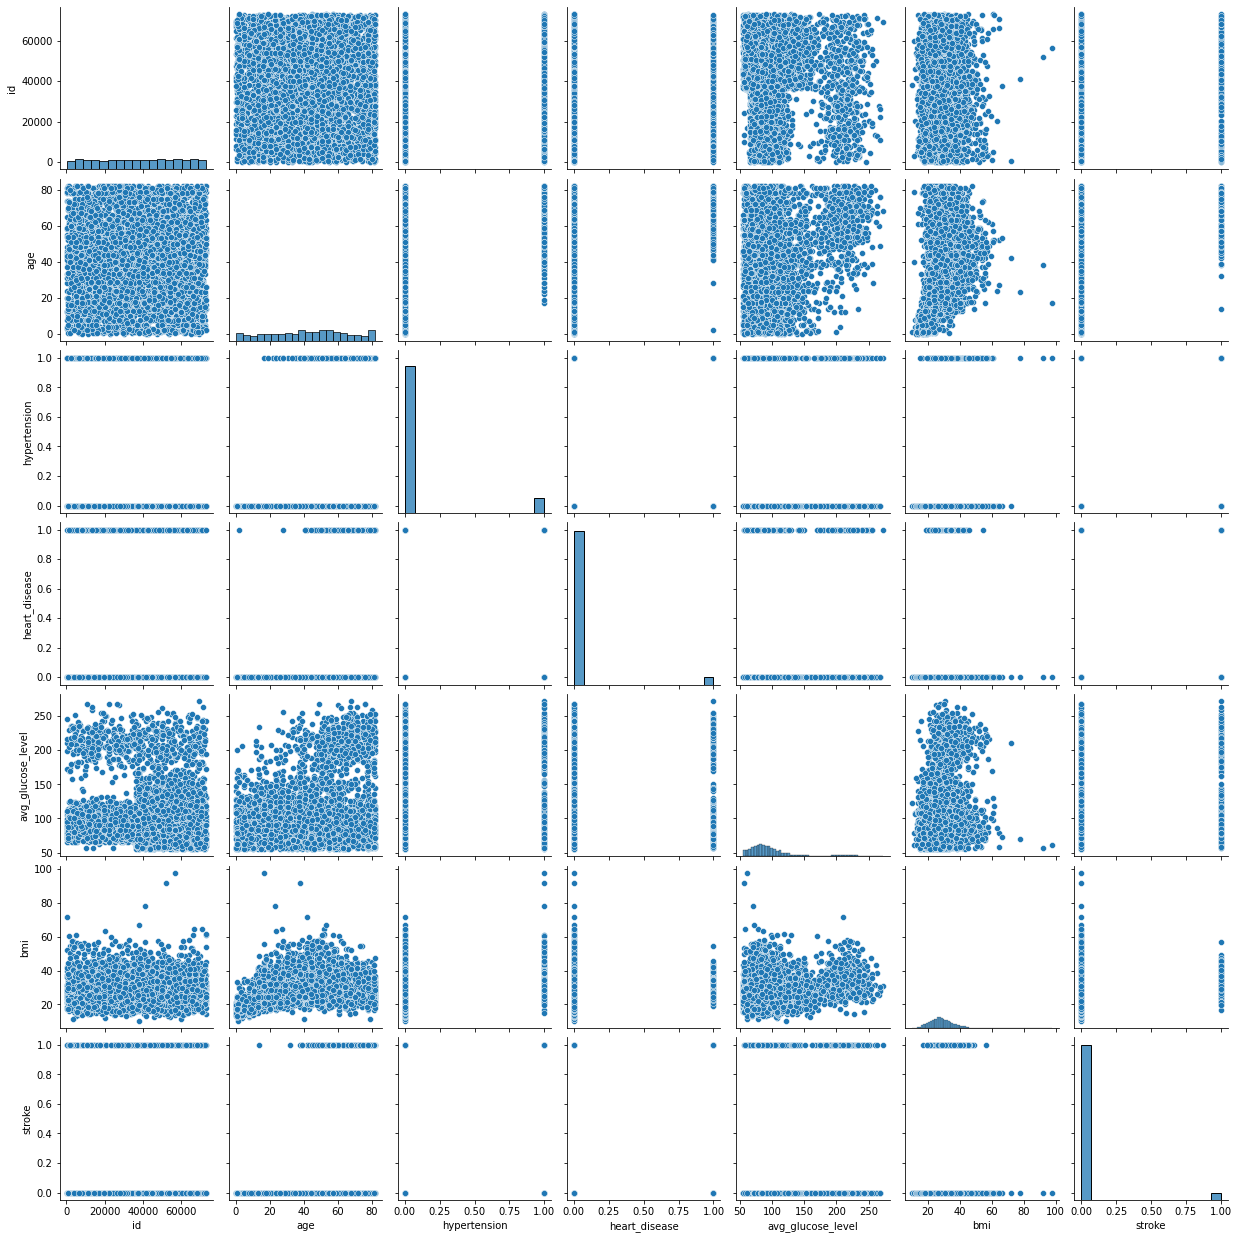

In [20]:
sns.pairplot(df)

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [22]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [23]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [24]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [25]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(['int64','float64'])

In [27]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
5104,Female,No,children,Rural,Unknown
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [28]:
df_num

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
5,56669,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [29]:
col_name=df_cat.columns

In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_cat =oe.fit_transform(df_cat)

In [31]:
df_cat

array([[1., 1., 2., 1., 1.],
       [1., 1., 2., 0., 2.],
       [0., 1., 2., 1., 3.],
       ...,
       [0., 1., 3., 0., 2.],
       [1., 1., 2., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [32]:
df_cat = pd.DataFrame(df_cat,columns=col_name)

In [33]:
df_cat = df_cat.reset_index()

In [34]:
df_num = df_num.reset_index()

In [35]:
df = pd.concat([df_cat,df_num],axis=1)

In [36]:
df

,index,gender,ever_married,work_type,Residence_type,smoking_status,index,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1.0,1.0,2.0,1.0,1.0,0,9046,67.0,0,1,228.69,36.6,1
1,1,1.0,1.0,2.0,0.0,2.0,2,31112,80.0,0,1,105.92,32.5,1
2,2,0.0,1.0,2.0,1.0,3.0,3,60182,49.0,0,0,171.23,34.4,1
3,3,0.0,1.0,3.0,0.0,2.0,4,1665,79.0,1,0,174.12,24.0,1
4,4,1.0,1.0,2.0,1.0,1.0,5,56669,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,4904,0.0,0.0,4.0,0.0,0.0,5104,14180,13.0,0,0,103.08,18.6,0
4905,4905,0.0,1.0,3.0,1.0,2.0,5106,44873,81.0,0,0,125.20,40.0,0
4906,4906,0.0,1.0,3.0,0.0,2.0,5107,19723,35.0,0,0,82.99,30.6,0
4907,4907,1.0,1.0,2.0,0.0,1.0,5108,37544,51.0,0,0,166.29,25.6,0


In [37]:
df.drop(['index','id'],axis=1,inplace=True)

In [38]:
df.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,1.0,2.0,1.0,1.0,67.0,0,1,228.69,36.6,1
1,1.0,1.0,2.0,0.0,2.0,80.0,0,1,105.92,32.5,1
2,0.0,1.0,2.0,1.0,3.0,49.0,0,0,171.23,34.4,1
3,0.0,1.0,3.0,0.0,2.0,79.0,1,0,174.12,24.0,1
4,1.0,1.0,2.0,1.0,1.0,81.0,0,0,186.21,29.0,1


# Test_Train_Split

In [39]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [40]:
x

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.0,1.0,2.0,1.0,1.0,67.0,0,1,228.69,36.6
1,1.0,1.0,2.0,0.0,2.0,80.0,0,1,105.92,32.5
2,0.0,1.0,2.0,1.0,3.0,49.0,0,0,171.23,34.4
3,0.0,1.0,3.0,0.0,2.0,79.0,1,0,174.12,24.0
4,1.0,1.0,2.0,1.0,1.0,81.0,0,0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...
4904,0.0,0.0,4.0,0.0,0.0,13.0,0,0,103.08,18.6
4905,0.0,1.0,3.0,1.0,2.0,81.0,0,0,125.20,40.0
4906,0.0,1.0,3.0,0.0,2.0,35.0,0,0,82.99,30.6
4907,1.0,1.0,2.0,0.0,1.0,51.0,0,0,166.29,25.6


In [41]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4904    0
4905    0
4906    0
4907    0
4908    0
Name: stroke, Length: 4909, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [43]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest, ypred))

In [44]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm=SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
bg = BaggingClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()

In [45]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1409
           1       0.00      0.00      0.00        64

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.96      0.94      1473



In [46]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1409
           1       0.08      0.02      0.03        64

    accuracy                           0.95      1473
   macro avg       0.52      0.50      0.50      1473
weighted avg       0.92      0.95      0.93      1473



In [47]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1409
           1       0.00      0.00      0.00        64

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.96      0.94      1473



In [48]:
mymodel(bg)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1409
           1       0.08      0.02      0.03        64

    accuracy                           0.95      1473
   macro avg       0.52      0.50      0.50      1473
weighted avg       0.92      0.95      0.93      1473



In [49]:
mymodel(ada)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1409
           1       0.67      0.03      0.06        64

    accuracy                           0.96      1473
   macro avg       0.81      0.52      0.52      1473
weighted avg       0.95      0.96      0.94      1473



In [50]:
mymodel(gb)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1409
           1       0.00      0.00      0.00        64

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.95      0.93      1473



In [51]:
mymodel(xgb)

[11:38:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1409
           1       0.12      0.03      0.05        64

    accuracy                           0.95      1473
   macro avg       0.54      0.51      0.51      1473
weighted avg       0.92      0.95      0.93      1473



In [52]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1409
           1       0.09      0.11      0.10        64

    accuracy                           0.91      1473
   macro avg       0.52      0.53      0.52      1473
weighted avg       0.92      0.91      0.92      1473



In [53]:
dt1 = DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1409
           1       0.12      0.09      0.11        64

    accuracy                           0.93      1473
   macro avg       0.54      0.53      0.54      1473
weighted avg       0.92      0.93      0.93      1473



In [54]:
for i in range(1,50):
    dt2 = DecisionTreeClassifier(criterion ='entropy',max_depth=i)
    dt2.fit(xtrain, ytrain)
    ypred = dt2.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.956551255940258
 2 -: 0.956551255940258
 3 -: 0.956551255940258
 4 -: 0.9545145960624576
 5 -: 0.9504412763068567
 6 -: 0.9517990495587237
 7 -: 0.9497623896809233
 8 -: 0.9470468431771895
 9 -: 0.9409368635437881
 10 -: 0.9314324507807196
 11 -: 0.923285811269518
 12 -: 0.9239646978954514
 13 -: 0.9226069246435845
 14 -: 0.9212491513917176
 15 -: 0.9198913781398507
 16 -: 0.9178547182620502
 17 -: 0.9063136456211812
 18 -: 0.911744738628649
 19 -: 0.9110658520027155
 20 -: 0.9158180583842498
 21 -: 0.9144602851323829
 22 -: 0.9097080787508486
 23 -: 0.9164969450101833
 24 -: 0.9090291921249152
 25 -: 0.9124236252545825
 26 -: 0.9151391717583164
 27 -: 0.9151391717583164
 28 -: 0.9137813985064495
 29 -: 0.9164969450101833
 30 -: 0.9137813985064495
 31 -: 0.9124236252545825
 32 -: 0.9103869653767821
 33 -: 0.9069925322471147
 34 -: 0.9137813985064495
 35 -: 0.911744738628649
 36 -: 0.9131025118805159
 37 -: 0.9097080787508486
 38 -: 0.9131025118805159
 39 -: 0.9124236252545825
 

In [55]:
dt3 = DecisionTreeClassifier(criterion ='entropy' ,max_depth=2)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1409
           1       0.00      0.00      0.00        64

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.96      0.94      1473



In [56]:
dt4 = DecisionTreeClassifier(min_samples_leaf=4)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1409
           1       0.20      0.14      0.16        64

    accuracy                           0.94      1473
   macro avg       0.58      0.56      0.57      1473
weighted avg       0.93      0.94      0.93      1473



In [57]:
for i in range(1,50):
    dt5 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i)
    dt5.fit(xtrain, ytrain)
    ypred = dt5.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.9164969450101833
 2 -: 0.9273591310251188
 3 -: 0.9321113374066531
 4 -: 0.9389002036659878
 5 -: 0.9389002036659878
 6 -: 0.9368635437881874
 7 -: 0.9389002036659878
 8 -: 0.9436524100475221
 9 -: 0.9463679565512559
 10 -: 0.9470468431771895
 11 -: 0.9477257298031229
 12 -: 0.9490835030549898
 13 -: 0.9497623896809233
 14 -: 0.9511201629327902
 15 -: 0.9538357094365241
 16 -: 0.9531568228105907
 17 -: 0.9558723693143245
 18 -: 0.956551255940258
 19 -: 0.956551255940258
 20 -: 0.956551255940258
 21 -: 0.956551255940258
 22 -: 0.956551255940258
 23 -: 0.956551255940258
 24 -: 0.956551255940258
 25 -: 0.956551255940258
 26 -: 0.956551255940258
 27 -: 0.956551255940258
 28 -: 0.956551255940258
 29 -: 0.956551255940258
 30 -: 0.956551255940258
 31 -: 0.956551255940258
 32 -: 0.956551255940258
 33 -: 0.956551255940258
 34 -: 0.956551255940258
 35 -: 0.956551255940258
 36 -: 0.956551255940258
 37 -: 0.956551255940258
 38 -: 0.956551255940258
 39 -: 0.956551255940258
 40 -: 0.95655125

In [58]:
dt6 = DecisionTreeClassifier(criterion = 'entropy' ,min_samples_leaf=16)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1409
           1       0.25      0.05      0.08        64

    accuracy                           0.95      1473
   macro avg       0.60      0.52      0.53      1473
weighted avg       0.93      0.95      0.94      1473



In [59]:
for i in range(1,50):
    dt7 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=i)
    dt7.fit(xtrain, ytrain)
    ypred = dt7.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.9151391717583164
 2 -: 0.9348268839103869
 3 -: 0.9409368635437881
 4 -: 0.9382213170400543
 5 -: 0.9375424304141209
 6 -: 0.9348268839103869
 7 -: 0.9368635437881874
 8 -: 0.9416157501697217
 9 -: 0.9436524100475221
 10 -: 0.9517990495587237
 11 -: 0.9524779361846571
 12 -: 0.9524779361846571
 13 -: 0.9517990495587237
 14 -: 0.956551255940258
 15 -: 0.956551255940258
 16 -: 0.956551255940258
 17 -: 0.956551255940258
 18 -: 0.956551255940258
 19 -: 0.956551255940258
 20 -: 0.956551255940258
 21 -: 0.956551255940258
 22 -: 0.956551255940258
 23 -: 0.956551255940258
 24 -: 0.956551255940258
 25 -: 0.956551255940258
 26 -: 0.956551255940258
 27 -: 0.956551255940258
 28 -: 0.956551255940258
 29 -: 0.956551255940258
 30 -: 0.956551255940258
 31 -: 0.956551255940258
 32 -: 0.956551255940258
 33 -: 0.956551255940258
 34 -: 0.956551255940258
 35 -: 0.956551255940258
 36 -: 0.956551255940258
 37 -: 0.956551255940258
 38 -: 0.956551255940258
 39 -: 0.956551255940258
 40 -: 0.956551255940

In [60]:
dt8 = DecisionTreeClassifier(criterion = 'gini' ,min_samples_leaf=16)
mymodel(dt8)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1409
           1       0.00      0.00      0.00        64

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.96      0.94      1473



In [61]:
cvs = cross_val_score(dt3, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) 

0.9574252965198238


In [62]:
cvs = cross_val_score(dt8, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) 

0.9549813046664631


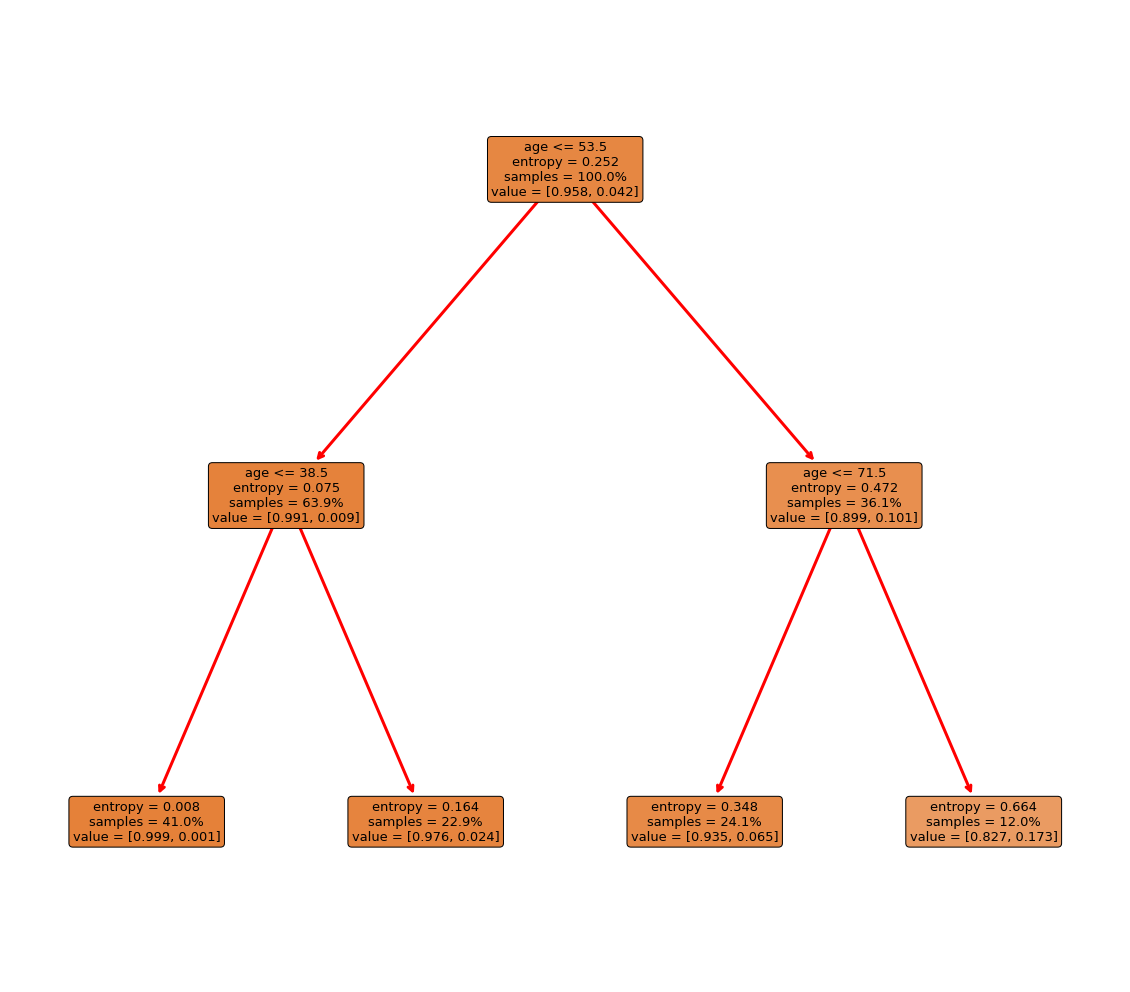

In [63]:
fig, ax = plt.subplots(figsize=(20,18))
chart = tree.plot_tree(dt3, feature_names=df.columns, fontsize=13, filled="True", proportion=True, rounded=10)

for node in chart:
    arrow = node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(3)

In [64]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(f'Accuracy : {accuracy_score(ypred,ytest)}')

Accuracy : 0.9558723693143245


In [65]:
# save model

In [66]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)